In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
df = pd.read_csv('./laptop_price.csv',encoding='latin-1')

In [3]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [4]:
df.rename(columns={'Price_euros':'Price'},inplace=True)

In [5]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df['Weight'] = df['Weight'].apply(lambda x: float(x.replace('kg','')))

In [7]:
df['Ram'] = df['Ram'].apply(lambda x: float(x.replace('GB','')))

In [8]:
df.drop(['laptop_ID','Product'],axis=1,inplace=True)

In [9]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [10]:
def gb_or_tb_to_mb(value):
    if "GB" in value:
        return float(value.replace('GB','')) * 1000
    elif "TB" in value:
        return float(value.replace('TB','')) * 1000 * 1000
df['Memory'] = df['Memory'].apply(lambda x: gb_or_tb_to_mb(x.split(' ')[0]))

In [11]:
df['ScreenWidth'] = df['ScreenResolution'].apply(lambda x: float(x.split(' ')[-1].split('x')[0]))
df['ScreenHeight'] = df['ScreenResolution'].apply(lambda x: float(x.split(' ')[-1].split('x')[1]))
screen_props = ['IPS','Full HD','Touchscreen','Quad HD+','4K']
for prop in screen_props:
    df[prop] = df['ScreenResolution'].apply(lambda x: (prop in x)*1)
df.drop('ScreenResolution',axis=1,inplace=True)

In [12]:
df = df.join(pd.get_dummies(df['OpSys'])*1).drop('OpSys',axis=1)

In [13]:
df = df.join(pd.get_dummies(df['Company'])*1).drop('Company',axis=1)

In [14]:
df = df.join(pd.get_dummies(df['TypeName'])*1).drop('TypeName',axis=1)

In [15]:
df

,Inches,Cpu,Ram,Memory,Gpu,Weight,Price,ScreenWidth,ScreenHeight,IPS,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,13.3,Intel Core i5 2.3GHz,8.0,128000.0,Intel Iris Plus Graphics 640,1.37,1339.69,2560.0,1600.0,1,...,0,0,0,0,0,0,0,0,1,0
1,13.3,Intel Core i5 1.8GHz,8.0,128000.0,Intel HD Graphics 6000,1.34,898.94,1440.0,900.0,0,...,0,0,0,0,0,0,0,0,1,0
2,15.6,Intel Core i5 7200U 2.5GHz,8.0,256000.0,Intel HD Graphics 620,1.86,575.00,1920.0,1080.0,0,...,0,0,0,0,0,0,0,1,0,0
3,15.4,Intel Core i7 2.7GHz,16.0,512000.0,AMD Radeon Pro 455,1.83,2537.45,2880.0,1800.0,1,...,0,0,0,0,0,0,0,0,1,0
4,13.3,Intel Core i5 3.1GHz,8.0,256000.0,Intel Iris Plus Graphics 650,1.37,1803.60,2560.0,1600.0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4.0,128000.0,Intel HD Graphics 520,1.80,638.00,1920.0,1080.0,1,...,0,0,0,0,1,0,0,0,0,0
1299,13.3,Intel Core i7 6500U 2.5GHz,16.0,512000.0,Intel HD Graphics 520,1.30,1499.00,3200.0,1800.0,1,...,0,0,0,0,1,0,0,0,0,0
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2.0,64000.0,Intel HD Graphics,1.50,229.00,1366.0,768.0,0,...,0,0,0,0,0,0,0,1,0,0
1301,15.6,Intel Core i7 6500U 2.5GHz,6.0,1000000.0,AMD Radeon R5 M330,2.19,764.00,1366.0,768.0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
cpus = df['Cpu'].apply(lambda x: x.split(' ')[0]).unique()
for cpu in cpus:
    df['Cpu_' + cpu] = df['Cpu'].apply(lambda x: (x.split(' ')[0] == cpu)*1)

In [17]:
gpus = df['Gpu'].apply(lambda x: x.split(' ')[0]).unique()
for gpu in gpus:
    df['Gpu_' + gpu] = df['Gpu'].apply(lambda x: (x.split(' ')[0] == gpu)*1)

In [18]:
df.drop(['Cpu','Gpu'],axis=1,inplace=True)

In [26]:
df

,Inches,Ram,Memory,Weight,Price,ScreenWidth,ScreenHeight,IPS,Full HD,Touchscreen,...,Notebook,Ultrabook,Workstation,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Gpu_Intel,Gpu_AMD,Gpu_Nvidia,Gpu_ARM
0,13.3,8.0,128000.0,1.37,1339.69,2560.0,1600.0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1,13.3,8.0,128000.0,1.34,898.94,1440.0,900.0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,15.6,8.0,256000.0,1.86,575.00,1920.0,1080.0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
3,15.4,16.0,512000.0,1.83,2537.45,2880.0,1800.0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,13.3,8.0,256000.0,1.37,1803.60,2560.0,1600.0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4.0,128000.0,1.80,638.00,1920.0,1080.0,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1299,13.3,16.0,512000.0,1.30,1499.00,3200.0,1800.0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
1300,14.0,2.0,64000.0,1.50,229.00,1366.0,768.0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1301,15.6,6.0,1000000.0,2.19,764.00,1366.0,768.0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [27]:
df.dtypes

Inches                float64
Ram                   float64
Memory                float64
Weight                float64
Price                 float64
ScreenWidth           float64
ScreenHeight          float64
IPS                     int64
Full HD                 int64
Touchscreen             int64
Quad HD+                int64
4K                      int64
Android                 int32
Chrome OS               int32
Linux                   int32
Mac OS X                int32
No OS                   int32
Windows 10              int32
Windows 10 S            int32
Windows 7               int32
macOS                   int32
Acer                    int32
Apple                   int32
Asus                    int32
Chuwi                   int32
Dell                    int32
Fujitsu                 int32
Google                  int32
HP                      int32
Huawei                  int32
LG                      int32
Lenovo                  int32
MSI                     int32
Mediacom  

In [19]:
score = 0
while score < 0.89:
    X = df.drop('Price',axis=1)
    Y = df['Price']
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    forest_reg = RandomForestRegressor()
    forest_reg.fit(X_train_scaled,Y_train)
    Y_preds = forest_reg.predict(X_test_scaled)
    score = r2_score(Y_test,Y_preds)
mae = mean_absolute_error(Y_test,Y_preds)
mse = mean_squared_error(Y_test,Y_preds)
print(f"""
R2 Score: {score}
Mean Absolute Error: {mae}
Mean Squared Error: {mse}
""")


R2 Score: 0.8985030539074788
Mean Absolute Error: 163.7668397349618
Mean Squared Error: 56835.546318288354



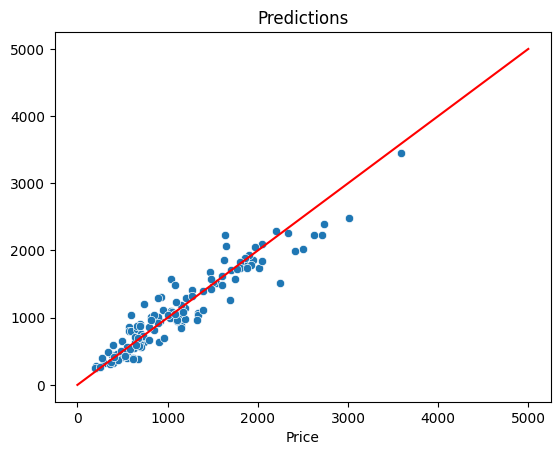

In [26]:
plt.title('Predictions')
sns.scatterplot(x=Y_test,y=Y_preds)
Y_range = range(0,5000)
plt.plot(Y_range,Y_range,color='red')
plt.show()

In [21]:
joblib.dump(forest_reg, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [24]:
reg = joblib.load('random_forest_model.joblib')

In [25]:
predictions = reg.predict(X_test_scaled)
Y_preds == predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,